In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [30]:
import pandas as pd
import os
import matplotlib.pyplot as plt

path='/content/gdrive/MyDrive/DT/201020_TestData/'
excel_original=pd.DataFrame()
for list in os.listdir(path):
  excel_original=pd.concat([excel_original,pd.read_excel(path+list)],axis=0)

In [ ]:
excel_original

,용접속도,송급속도,전압보정,위빙(hz),위빙(좌),위빙(우),Unnamed: 6,WELDTIME,CURRENT,VOLTAGE,GAS,WIRESPEED,WINDSPEED,WINDANGLE,Unnamed: 14,Pass,형상,두께(1),두께(2),Unnamed: 19,Start,End,정상,언더컷,기공,용락,오버랩,용접선 이탈 (벽),용접선 이탈
0,35,10.0,-3.0,2,0.3,0.3,NaN,0.01,6.3,0.9,32.5,1.8,0.0,144,NaN,1,4,20,19,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35,10.0,-3.0,2,0.3,0.3,NaN,0.02,7.9,0.9,32.5,1.7,0.0,144,NaN,1,4,20,19,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35,10.0,-3.0,2,0.3,0.3,NaN,0.03,17.2,0.8,32.5,1.8,0.0,144,NaN,1,4,20,19,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35,10.0,-3.0,2,0.3,0.3,NaN,0.04,19.7,0.7,32.5,1.8,0.0,144,NaN,1,4,20,19,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,35,10.0,-3.0,2,0.3,0.3,NaN,0.05,36.3,0.9,32.4,1.8,0.0,144,NaN,1,4,20,19,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4746,32,9.0,-2.5,2,0.3,0.3,NaN,47.47,1.5,76.9,23.1,0.7,0.4,185,NaN,1,4,20,19,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4747,32,9.0,-2.5,2,0.3,0.3,NaN,47.48,19.7,76.9,23.1,0.7,0.4,185,NaN,1,4,20,19,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4748,32,9.0,-2.5,2,0.3,0.3,NaN,47.49,3.5,76.9,23.0,0.7,0.4,185,NaN,1,4,20,19,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4749,32,9.0,-2.5,2,0.3,0.3,NaN,47.50,14.0,76.9,23.0,0.7,0.4,185,NaN,1,4,20,19,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#excel_original: 모든 파일 통합 데이터
excel=excel_original.drop(['Unnamed: 6','Unnamed: 14','Unnamed: 19','용접선 이탈 (벽)','용접선 이탈'],axis=1)#고려필요 없음(read_me)
excel=excel.drop(['용접속도','송급속도','전압보정','위빙(hz)','위빙(좌)','위빙(우)'],axis=1)#고려필요 없음(read_me) 질문필요
excel=excel.drop(excel[(excel['Start']==1.0)|(excel['End']==1.0)].index)#Start, End에 해당=> 제거(read_me)
excel=excel.drop(['Start','End'],axis=1)

In [ ]:
excel

,WELDTIME,CURRENT,VOLTAGE,GAS,WIRESPEED,WINDSPEED,WINDANGLE,Pass,형상,두께(1),두께(2),정상,언더컷,기공,용락,오버랩
304,3.05,452.5,30.5,29.9,10.1,0.0,144,1,4,20,19,1.0,NaN,NaN,NaN,NaN
305,3.06,274.2,30.9,29.9,10.2,0.0,144,1,4,20,19,1.0,NaN,NaN,NaN,NaN
306,3.07,328.9,30.3,29.9,10.3,0.0,144,1,4,20,19,NaN,NaN,NaN,1.0,NaN
307,3.08,313.7,30.1,29.9,10.3,0.0,144,1,4,20,19,NaN,NaN,NaN,1.0,NaN
308,3.09,311.7,30.1,29.8,10.3,0.0,144,1,4,20,19,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,42.66,404.1,28.6,23.1,9.1,0.4,185,1,4,20,19,NaN,1.0,NaN,NaN,NaN
4266,42.67,261.1,28.9,23.1,9.2,0.4,185,1,4,20,19,NaN,1.0,NaN,NaN,NaN
4267,42.68,391.7,28.7,23.1,9.2,0.4,185,1,4,20,19,NaN,1.0,NaN,NaN,NaN
4268,42.69,207.3,28.9,23.0,9.3,0.4,185,1,4,20,19,NaN,1.0,NaN,NaN,NaN


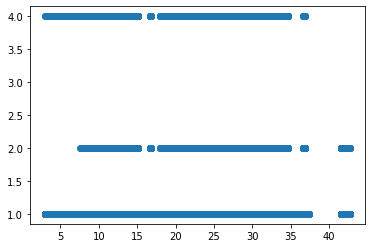

In [ ]:
plt.scatter(excel['WELDTIME'],excel['label'])
plt.show()

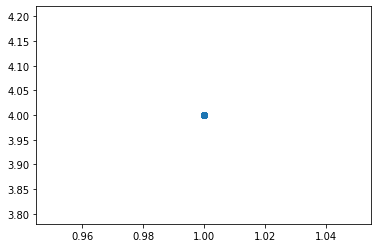

In [ ]:
plt.scatter(excel['Pass'],excel['형상'])
plt.show()

In [ ]:
excel=excel.drop(['Pass','형상','두께(1)','두께(2)'],axis=1)#다 일정한 값을 가짐
excel=excel.drop(['WIRESPEED','WINDSPEED','WINDANGLE'],axis=1)#read_me 조건에서 처리 질문필요

In [ ]:
print(excel.isnull().sum())#독립변수에서의 결측값 존재X     기공, 오버랩 종속변수가 전부다 NaN되어있음
print(sum((excel.isnull().sum(axis=1)==4))) #종속변수 전부다 NaN 혹은 두개 이상 1.0인지 확인
excel

WELDTIME        0
CURRENT         0
VOLTAGE         0
GAS             0
정상          11816
언더컷         26206
기공          31863
용락          25704
오버랩         31863
dtype: int64
31863


,WELDTIME,CURRENT,VOLTAGE,GAS,정상,언더컷,기공,용락,오버랩
304,3.05,452.5,30.5,29.9,1.0,NaN,NaN,NaN,NaN
305,3.06,274.2,30.9,29.9,1.0,NaN,NaN,NaN,NaN
306,3.07,328.9,30.3,29.9,NaN,NaN,NaN,1.0,NaN
307,3.08,313.7,30.1,29.9,NaN,NaN,NaN,1.0,NaN
308,3.09,311.7,30.1,29.8,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...
4265,42.66,404.1,28.6,23.1,NaN,1.0,NaN,NaN,NaN
4266,42.67,261.1,28.9,23.1,NaN,1.0,NaN,NaN,NaN
4267,42.68,391.7,28.7,23.1,NaN,1.0,NaN,NaN,NaN
4268,42.69,207.3,28.9,23.0,NaN,1.0,NaN,NaN,NaN


In [ ]:
plt.scatter(excel['WIRESPEED'],excel['WINDSPEED'])
plt.show()

KeyError: ignored

In [ ]:
plt.scatter(excel['WIRESPEED'],excel['WINDANGLE'])
plt.show()

In [ ]:
plt.scatter(excel['WINDSPEED'],excel['WINDANGLE'])
plt.show()

In [ ]:
excel=excel.fillna(0)
excel

In [ ]:
excel[excel['정상']==0.0]

In [ ]:
excel[excel['정상']==1.0]

In [ ]:
excel['CURRENT'].plot(kind='hist',bins=100)

In [ ]:
excel['VOLTAGE'].plot(kind='hist',bins=1000)

In [ ]:
excel['GAS'].plot(kind='hist',bins=100)

In [ ]:
np.log10(excel['GAS']).plot(kind='hist',bins=100)#왜도 +

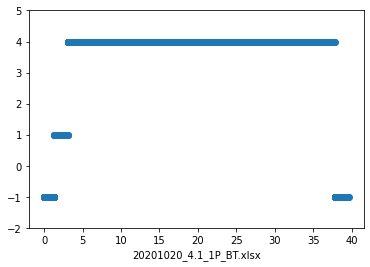

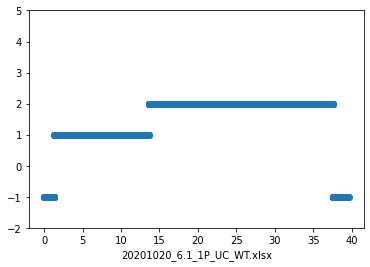

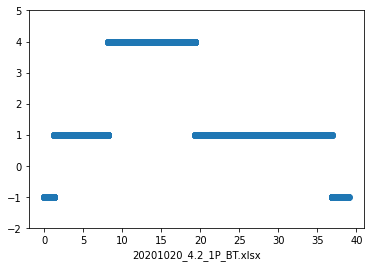

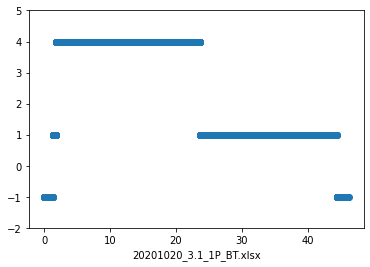

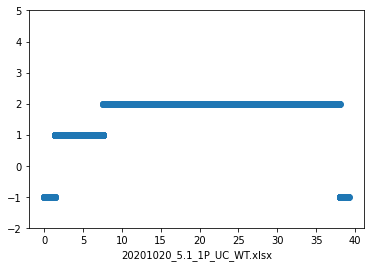

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4361 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4520 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4355 missing from current font.
  font.set_text(s

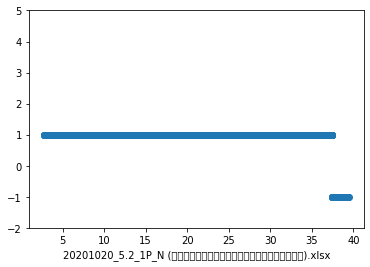

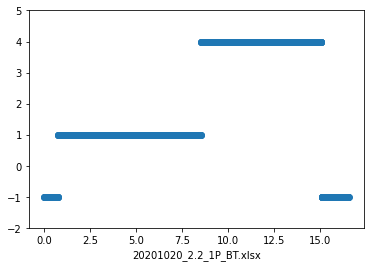

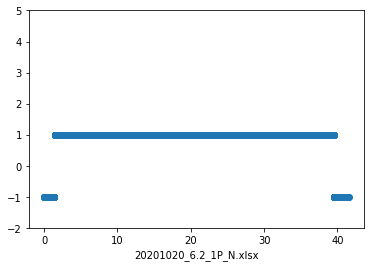

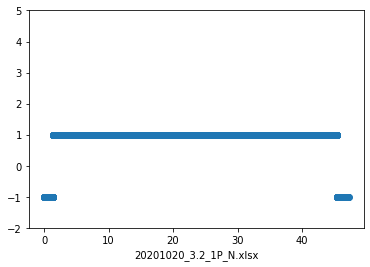

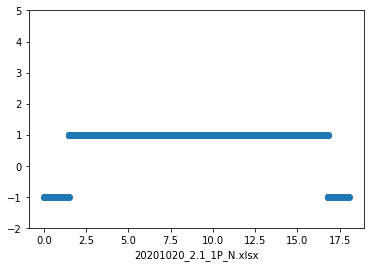

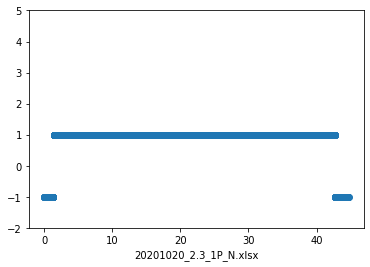

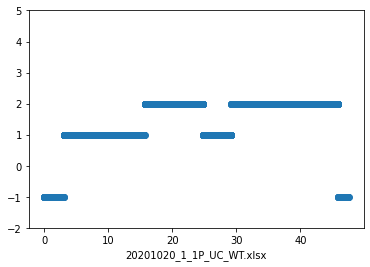

In [31]:
path='/content/gdrive/MyDrive/DT/201020_TestData/'
excel_original=pd.DataFrame()
for list in os.listdir(path):
  excel=pd.read_excel(path+list)
  #excel=excel_original.drop(['Unnamed: 6','Unnamed: 14','Unnamed: 19','용접선 이탈 (벽)','용접선 이탈'],axis=1)#고려필요 없음(read_me)
  excel=excel.drop(['용접속도','송급속도','전압보정','위빙(hz)','위빙(좌)','위빙(우)'],axis=1)#고려필요 없음(read_me) 질문필요
  #excel=excel.drop(excel[(excel['Start']==1.0)|(excel['End']==1.0)].index)#Start, End에 해당=> 제거(read_me)
  #excel=excel.drop(['Start','End'],axis=1)
  excel=excel.fillna(0)
  conditionlist = [
    (excel['정상'] ==1) ,
    (excel['언더컷'] ==1) ,
    (excel['기공'] ==1) ,
    (excel['용락'] ==1) ,
    (excel['오버랩'] ==1) ]
  choicelist = [1, 2, 3, 4, 5]
  excel['label'] = np.select(conditionlist, choicelist, default=-1)
  plt.scatter(excel['WELDTIME'],excel['label'])
  plt.ylim((-2,5))
  plt.xlabel(list)
  plt.show()
 # excel_original=pd.concat([excel_original,pd.read_excel(path+list)],axis=0)